In [ ]:
df = fs/N
ff = np.linspace(0, (N-1)*df, N)
plt.figure(1)
ft_XX = 1/N*np.fft.fft( sr, axis = 0 )
bfrec = ff <= fs/2
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_XX[bfrec])**2))

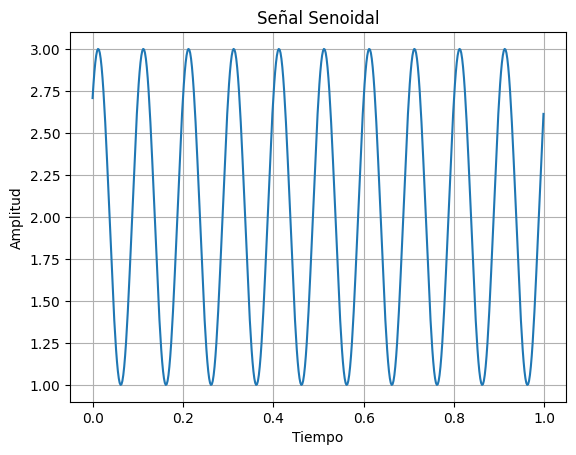

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
A = 1.0         # Amplitud
f = 10.0         # Frecuencia (en Hz)
ph = np.pi / 4  # Fase (en radianes)
DC = 2.0        # Componente de continua

# Crear puntos de tiempo
fs = 500                #   Frecuencia de muestreo en Hz
N  = fs                 #   Cantidad de muestras digitalizadas por el ADC (# muestras)
Ts = 1/fs               #   Periodo de muestreo
T_simulacion = N*Ts     #   Duracion total del la simulación en segundos
t = np.arange(start=0, stop=T_simulacion, step=Ts)  # Generar 1000 puntos de tiempo de 0 a 1 segundo

# Generar la señal senoidal
signal = A * np.sin(2 * np.pi * f * t + ph) + DC

# Graficar la señal
plt.plot(t, signal)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal Senoidal')
plt.grid(True)
plt.show()


C:\Users\david\AppData\Local\Temp\ipykernel_13592\3417156374.py:26: RuntimeWarning: divide by zero encountered in log10
  plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_XX[bfrec])**2))


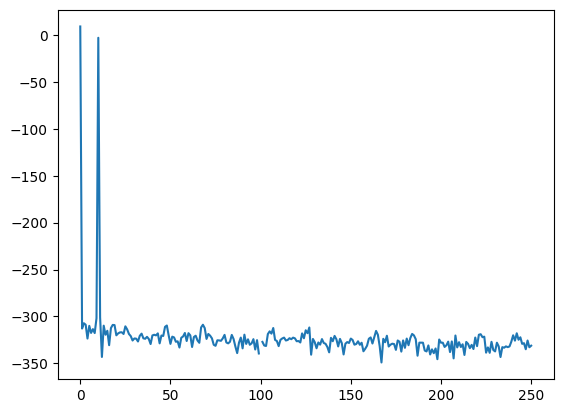

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
A = 1.0         # Amplitud
f = 10.0        # Frecuencia (en Hz)
ph = np.pi / 4  # Fase (en radianes)
DC = 2.0        # Componente de continua

# Crear puntos de tiempo
fs = 500                # Frecuencia de muestreo en Hz
N = fs                  # Cantidad de muestras digitalizadas por el ADC (# muestras)
Ts = 1/fs               # Periodo de muestreo
T_simulacion = N*Ts     # Duracion total del la simulación en segundos
t = np.arange(start=0, stop=T_simulacion, step=Ts)  # Generar puntos de tiempo

# Generar la señal senoidal
signal = A * np.sin(2 * np.pi * f * t + ph) + DC

# Calcular el PSD usando la STFT
df = fs/N
ff = np.linspace(0, (N-1)*df, N)
plt.figure(1)
ft_XX = 1/N*np.fft.fft( signal, axis = 0 )
bfrec = ff <= fs/2
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_XX[bfrec])**2))


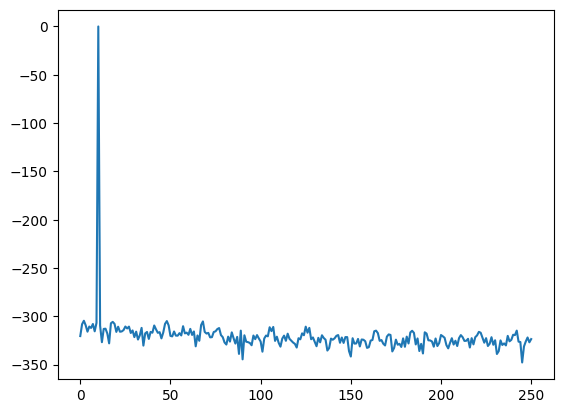

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
from scipy import signal

#Definicion de parametros de simulacion
fs = 500                #   Frecuencia de muestreo en Hz
N  = fs                 #   Cantidad de muestras digitalizadas por el ADC (# muestras)
Ts = 1/fs               #   Periodo de muestreo
T_simulacion = N*Ts     #   Duracion total del la simulación

def plot_signal(tt, signal, title, color):
    plt.figure(figsize=(12, 4))
    plt.plot(tt, signal,label=title, color=color)
    plt.xlabel('tiempo [s]')
    plt.ylabel('Amplitud [V]')
    plt.grid(True, linestyle='dotted', color='gray')
    plt.savefig(f'{title}.png', bbox_inches='tight', transparent=True)
    plt.close()
    
def mi_funcion_sen(vmax = 1, dc = 0, ff = 1, ph = 0, nn = N, fs = fs):
    tt = np.arange(start=0, stop=T_simulacion, step=Ts)
    xx = vmax*np.sin(2*np.pi*ff*tt + ph) + dc
    return tt, xx

frecuencia    = 10        # frecuencia de la señal en Hz
Amplitud      = np.sqrt(2)        # Amplitud máxiva en Volt
Phase         = np.pi/2.0 # Fase en radianes
ValorMedio    = 0         # Componente de continua

tiempo, SignalSen = mi_funcion_sen(vmax=Amplitud, ff=frecuencia, dc=ValorMedio, ph=Phase)

sigma = np.var(SignalSen)
nn = np.random.normal()

df = fs/N

ff = np.linspace(0, (N-1)*df, N)
plt.figure(1)
ft_XX = (1/N)*np.fft.fft( SignalSen, axis = 0 )
bfrec = ff <= fs/2
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_XX[bfrec])**2))

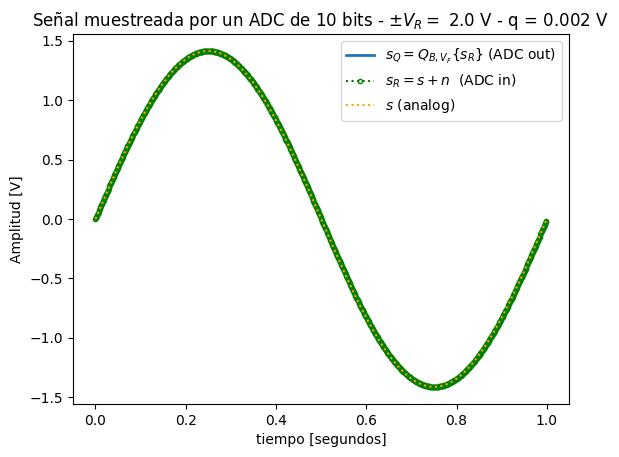

Text(0.5, 1.0, 'Ruido de cuantización para 10 bits - $\\pm V_R= $ 2.0 V - q = 0.002 V')

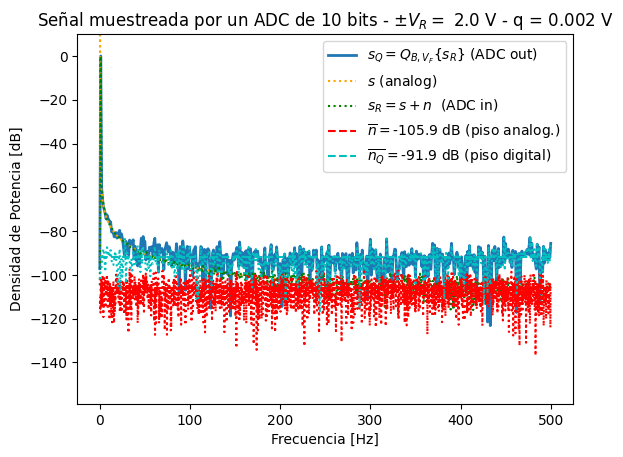

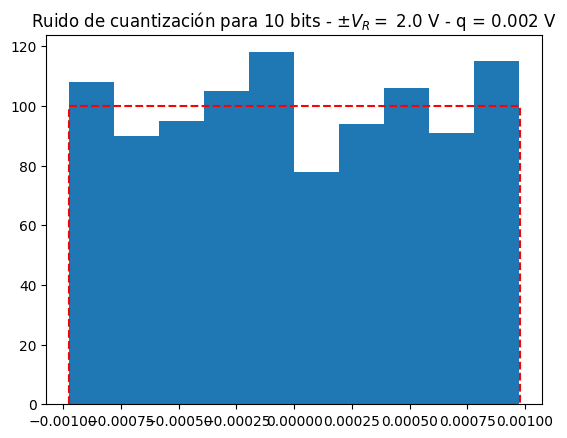

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Sep  8 16:56:51 2021

PDS TS 3/4

En este script se simula un conversor analógico digital (ADC) mediante el 
re-muestreo y cuantización de una señal más densamente muestreada, simulando una señal continua en tiempo y amplitud. En el script se analiza el efecto del ALIAS, producto del muesrtreo, y el ruido de cuantización producido por la cuantización.
El experimento permite hacer una pre-distorsión de la "señal analógica" simulando un "piso de ruido", luego se analiza cómo afecta el mismo a la cuantización del ADC. También se puede analizar si la predistorsión está correlada (mediante una señal chirp) o incorrelada (ruido Gaussiano) respecto a la senoidal de prueba.

@author: mariano
"""

#%% Configuración e inicio de la simulación

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig


# Datos generales de la simulación
fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras

# cantidad de veces más densa que se supone la grilla temporal para tiempo "continuo"
over_sampling = 4
N_os = N*over_sampling

# Datos del ADC
B = 10 # bits
Vf = 2 # Volts
q = Vf/2**B # Volts

# datos del ruido
kn = 1/100
pot_ruido = q**2/12 * kn # Watts (potencia de la señal 1 W)

ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

#%% Acá arranca la simulación

# grilla de sampleo temporal
tt = np.linspace(0, (N-1)*ts, N)
tt_os = np.linspace(0, (N-1)*ts, N_os)

# grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N)
ff_os = np.linspace(0, (N-1)*df, N_os)

# Concatenación de matrices:
# guardaremos las señales creadas al ir poblando la siguiente matriz vacía

analog_sig = np.sin( 2*np.pi*1*df*tt_os )

analog_sig = analog_sig / np.sqrt(np.var(analog_sig))

# Generación de la señal de interferencia
# incorrelada
nn = np.random.normal(0, np.sqrt(pot_ruido), size=N_os)

# muy correlada
# nn = sig.chirp(tt_os, 2*df, (N-1)*ts, fs/2)
# nn = nn / np.sqrt(np.var(nn)) * np.sqrt(pot_ruido)

# construimos la señal de entrada al ADC
sr = analog_sig + nn
# sr = analog_sig 

# muestreo la señal analógica 1 cada OS muestras
sr = sr[::over_sampling]

# cuantizo la señal muestreada
srq = q * np.round(sr/q)

# ruido de cuantización
nq = srq - sr

#%% Presentación gráfica de los resultados
plt.close('all')

plt.figure(1)
plt.plot(tt, srq, lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt, sr, linestyle=':', color='green',marker='o', markersize=3, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$ s_R = s + n $  (ADC in)')
plt.plot(tt_os, analog_sig, color='orange', ls='dotted', label='$ s $ (analog)')

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()


plt.figure(2)
ft_SR = 1/N*np.fft.fft( sr, axis = 0 )
ft_Srq = 1/N*np.fft.fft( srq, axis = 0 )
ft_As = 1/N*np.fft.fft( analog_sig, axis = 0)
ft_Nq = 1/N*np.fft.fft( nq, axis = 0 )
ft_Nn = 1/N*np.fft.fft( nn, axis = 0 )
bfrec = ff <= fs/2

Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)

plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_As[ff_os <= fs/2])**2), color='orange', ls='dotted', label='$ s $ (analog)' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $  (ADC in)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_Nn[ff_os <= fs/2])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(10* np.log10(2* nNn_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(10* np.log10(2* Nnq_mean)) )
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()
# suponiendo valores negativos de potencia ruido en dB
plt.ylim((1.5*np.min(10* np.log10(2* np.array([Nnq_mean, nNn_mean]))),10))


plt.figure(3)
bins = 10
plt.hist(nq, bins=bins)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))




Media de la distribución: 0 -- Estimación de la media: 0.000102768
Varianza de la distribución (q^2/12): 1.38474e-05 -- Estimación de la varianza: 1.38807e-05


Text(0.5, 0, 'Demora [#]')

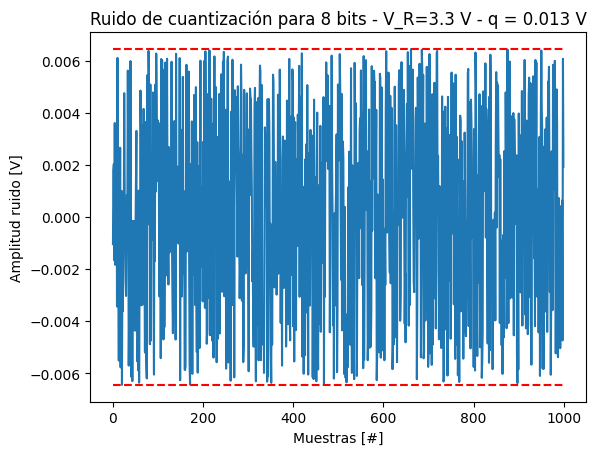

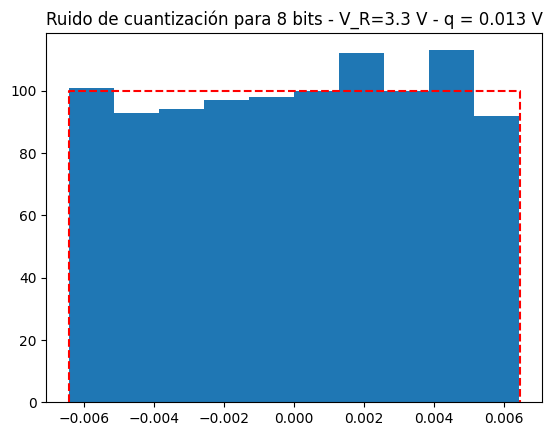

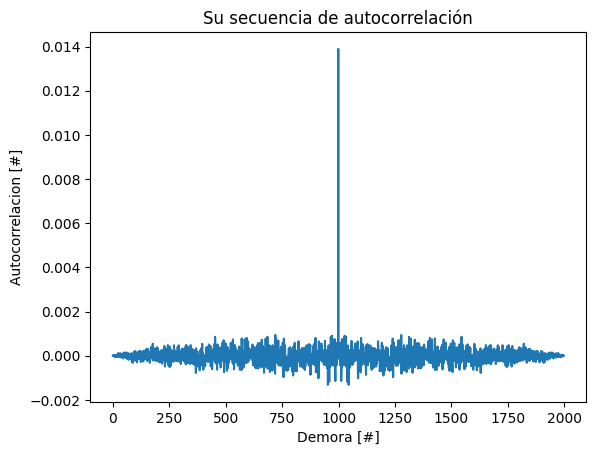

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 26 20:44:40 2020

@author: Mariano Llamedo Soria llamedom@frba.utn.edu.ar

Simulamos el comportamiento del ruido de cuantización que podemos encontrar
en un conversor analógico digital (ADC) de B bits. Comparamos las estimaciones
de sus estadísticos con las que deberían tener según la distribución de 
sus valores (uniforme). Visualizamos algunos resultados, como también
el histograma de la señal de ruido.
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

N = 1000; # muestras
B = 8 # bits
Vref = 3.3 # Volts

q = Vref/2**B

nn = np.random.uniform(-q/2,high=q/2, size=N)

nn_m = np.mean(nn)
nn_var = np.var(nn)

print('Media de la distribución: 0 -- Estimación de la media: {:g}'.format(nn_m) )
print('Varianza de la distribución (q^2/12): {:g} -- Estimación de la varianza: {:g}'.format(q**2/12, nn_var) )

nn_ac = sig.correlate( nn, nn)

plt.close('all')

plt.figure(1)
plt.plot(nn)
plt.plot( np.array([0, N]), np.array([-q/2, -q/2]), '--r' )
plt.plot( np.array([0, N]), np.array([q/2, q/2]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - V_R={:3.1f} V - q = {:3.3f} V'.format(B, Vref, q))
plt.ylabel('Amplitud ruido [V]')
plt.xlabel('Muestras [#]')

plt.figure(2)
bins = 10
plt.hist(nn, bins=bins)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - V_R={:3.1f} V - q = {:3.3f} V'.format(B, Vref, q))

plt.figure(3)
plt.plot(nn_ac)
plt.title( 'Su secuencia de autocorrelación'.format(B,Vref))
plt.ylabel('Autocorrelacion [#]')
plt.xlabel('Demora [#]')

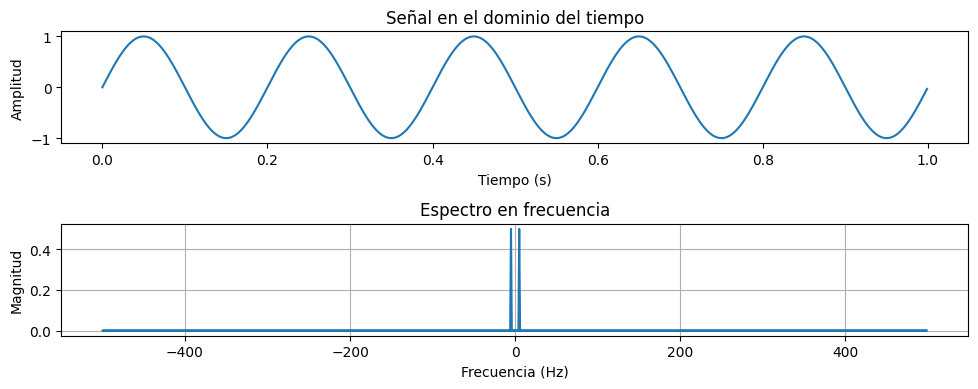

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def dft(x):
    N = len(x)  # Número de muestras de la señal de entrada
    X = np.zeros(N, dtype=np.complex128)  # Inicializamos un arreglo para almacenar la DFT

    for m in range(N):
        X[m] = 0
        for n in range(N):
            X[m] += x[n] * np.exp(-2j * np.pi * m * n / N)

    return X/N

# Crear una señal de ejemplo (en este caso, una señal senoidal)
fs = 1000  # Frecuencia de muestreo en Hz
T = 1.0  # Duración de la señal en segundos
t = np.linspace(0.0, T, int(fs * T), endpoint=False)  # Vector de tiempo
x = np.sin(2 * np.pi * 5 * t)

# Calcular la DFT de la señal
X = dft(x)

# Calcular la magnitud del espectro en frecuencia
X_mag = np.abs(X)

# Crear un vector de frecuencia
frequencies = np.fft.fftfreq(len(X_mag), d=1/fs)

# Visualizar el espectro en frecuencia
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title('Señal en el dominio del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(frequencies, X_mag)
plt.title('Espectro en frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid()

plt.tight_layout()
plt.show()


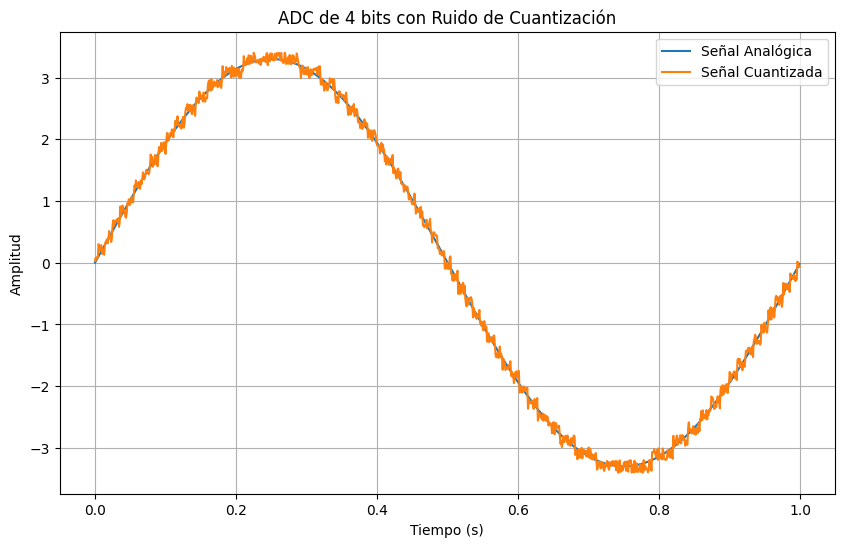

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Configurar parámetros
bits = 4  # Número de bits del ADC
voltage_range = 3.3  # Rango de voltaje +/- 3.3V
num_samples = 1000  # Número de muestras
signal_frequency = 1.0  # Frecuencia de la señal analógica (Hz)
sampling_frequency = 1000.0  # Frecuencia de muestreo (Hz)

# Generar una señal analógica senoidal
time = np.arange(0, num_samples) / sampling_frequency
analog_signal = voltage_range * np.sin(2 * np.pi * signal_frequency * time)

# Cuantificar la señal con el ADC de b bits y agregar ruido de cuantización
quantization_levels = 2 ** bits
quantization_step = voltage_range / quantization_levels
quantization_noise = np.random.uniform(-quantization_step / 2, quantization_step / 2, num_samples)
quantized_signal = np.round(analog_signal / quantization_step) * quantization_step + quantization_noise

# Graficar la señal analógica y la señal cuantizada
plt.figure(figsize=(10, 6))
plt.plot(time, analog_signal, label='Señal Analógica')
plt.plot(time, quantized_signal, label='Señal Cuantizada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.title(f'ADC de {bits} bits con Ruido de Cuantización')
plt.show()



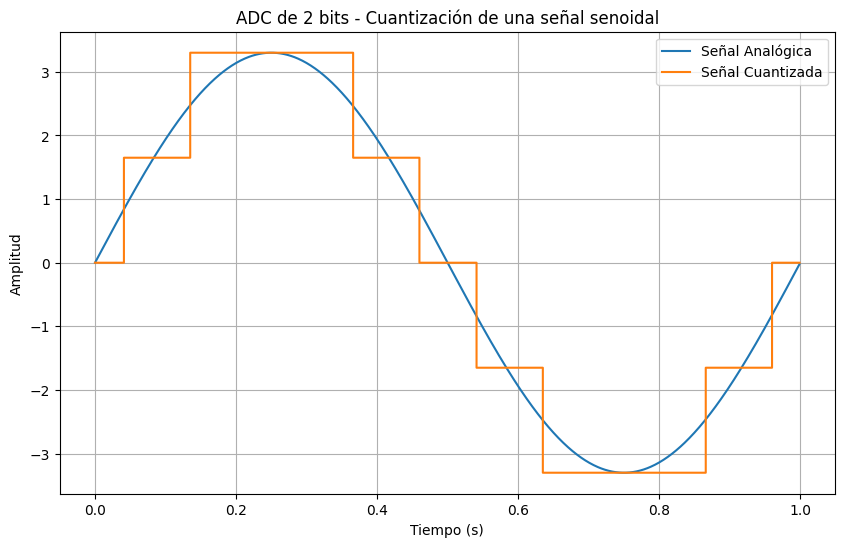

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del ADC
bits = 2              # Número de bits del ADC
voltage_range = 3.3   # Rango de voltaje +/- Vcc
amplitude = voltage_range  # Amplitud de la señal senoidal

# Generar una señal senoidal que recorra todo el rango de tensión
num_samples = 1000  # Un punto de muestreo por nivel de cuantización
time = np.arange(0, num_samples) / num_samples
analog_signal = amplitude * np.sin(2 * np.pi * time)

# Cuantificar la señal senoidal con el ADC de B bits
quantization_levels = 2 ** bits
quantization_step = (2 * voltage_range) / quantization_levels
quantized_signal = np.round(analog_signal / quantization_step) * quantization_step

# Gráficos
plt.figure(figsize=(10, 6))
plt.plot(time, analog_signal, label='Señal Analógica')
plt.step(time, quantized_signal, label='Señal Cuantizada', where='post')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.title(f'ADC de {bits} bits - Cuantización de una señal senoidal')
plt.show()


0.01120086738062773


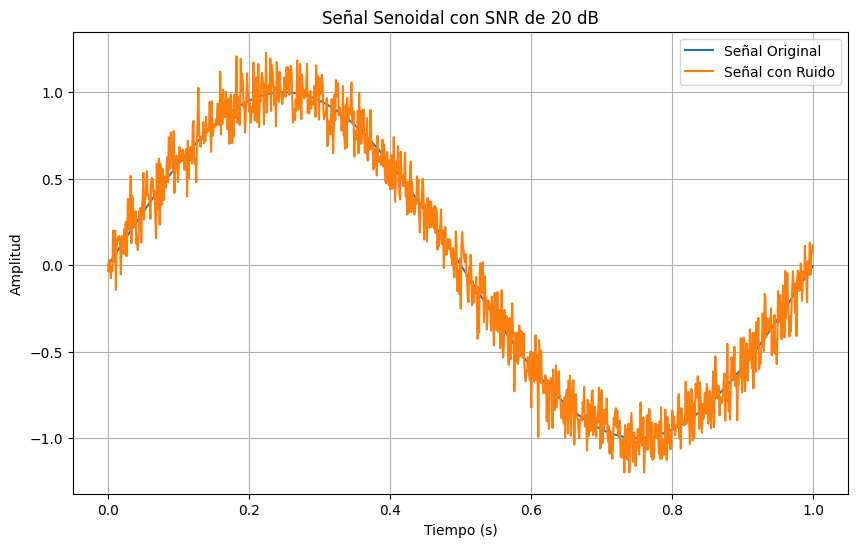

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal senoidal
amplitude = 1.0
frequency = 1.0  # Hz
duration = 1.0   # segundos
sampling_rate = 1000.0  # Hz

# Genera la señal senoidal
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Calcula la potencia de la señal
signal_power = np.mean(signal ** 2)

# Relación señal-ruido (SNR) deseada en dB
snr_db = 20

# Calcula la potencia del ruido a partir de la SNR
noise_power_db = signal_power - snr_db
noise_power = 10 ** (noise_power_db / 10)

# Genera el ruido de distribución normal
noise = np.random.normal(0, np.sqrt(noise_power), len(signal))
print(np.var(noise))
# Suma el ruido a la señal senoidal
signal_with_noise = signal + noise

# Grafica la señal original y la señal con ruido
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Señal Original')
plt.plot(t, signal_with_noise, label='Señal con Ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.title(f'Señal Senoidal con SNR de {snr_db} dB')
plt.show()
